In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 1) DATA PREPROCESSING

# i) Load the raw data into pandas dataframe
os.chdir(r"C:\Users\suean\END_TO_END_DATA_SCIENCE_PROJECTS\house-price-prediction")
data = pd.read_csv("data/raw/house_prices_100.csv")
print(data.head())
print(data)

   area  bedrooms  age          price
0  1360         4    1  205199.773599
1  1794         3   19  241583.895224
2  1630         3    2  225244.862441
3  1595         1   44  199905.355850
4  2138         3   26  251123.589100
    area  bedrooms  age          price
0   1360         4    1  205199.773599
1   1794         3   19  241583.895224
2   1630         3    2  225244.862441
3   1595         1   44  199905.355850
4   2138         3   26  251123.589100
..   ...       ...  ...            ...
95  2562         2    4  300874.083434
96   564         2   33   82950.575255
97  3068         4   14  360748.814953
98  1867         5   21  221250.384284
99  1652         1   48  181198.071584

[100 rows x 4 columns]


2) EXPLORATORY DATA ANALYSIS (EDA):

Summary statistics for numeric and categorical variables.
Visualize distributions using histograms, boxplots, etc.
Analyze relationships using scatterplots and correlation heatmaps.
Handle missing values, if any
Check for multicollinearity among features.


area        0
bedrooms    0
age         0
price       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      100 non-null    int64  
 1   bedrooms  100 non-null    int64  
 2   age       100 non-null    int64  
 3   price     100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB
None
              area    bedrooms         age          price
count   100.000000  100.000000  100.000000     100.000000
mean   2018.550000    2.870000   24.320000  249642.697844
std     855.173671    1.425985   14.214717   85587.790875
min     521.000000    1.000000    1.000000   82950.575255
25%    1309.000000    1.000000   11.750000  174701.262963
50%    1934.000000    3.000000   24.500000  246797.207246
75%    2773.000000    4.000000   35.000000  324500.314941
max    3445.000000    5.000000   49.000000  404571.800008


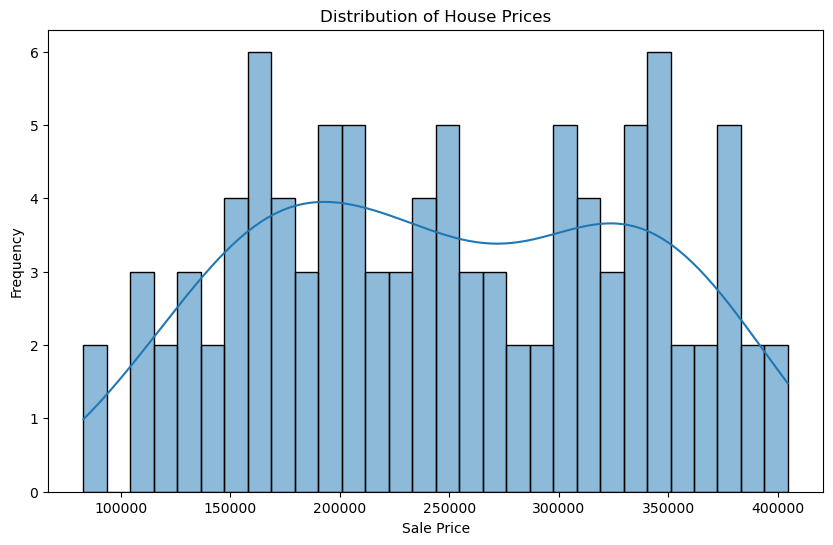

In [3]:
# ii) Exploratory data analysis (EDA) to understand dataset
# Check for missing values
print(data.isnull().sum())

# Get dataset summary
print(data.info())
print(data.describe())

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()


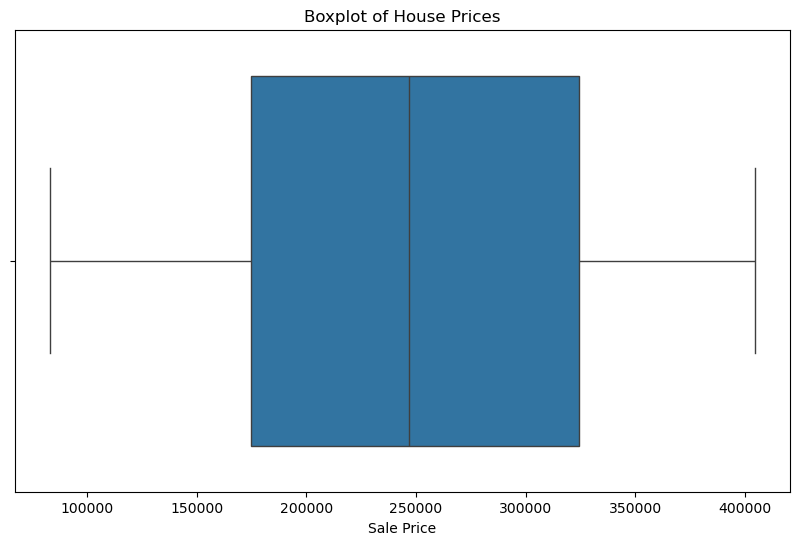

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title("Boxplot of House Prices")
plt.xlabel("Sale Price")
plt.show()

In [5]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers (values outside the bounds)
outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

# Print outliers
print("Outliers detected:")
print(outliers)

# Optionally: Remove outliers from the dataset
df_filtered = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

# Print the filtered data
print("\nData after removing outliers:")
print(df_filtered)

Outliers detected:
Empty DataFrame
Columns: [area, bedrooms, age, price]
Index: []

Data after removing outliers:
    area  bedrooms  age          price
0   1360         4    1  205199.773599
1   1794         3   19  241583.895224
2   1630         3    2  225244.862441
3   1595         1   44  199905.355850
4   2138         3   26  251123.589100
..   ...       ...  ...            ...
95  2562         2    4  300874.083434
96   564         2   33   82950.575255
97  3068         4   14  360748.814953
98  1867         5   21  221250.384284
99  1652         1   48  181198.071584

[100 rows x 4 columns]


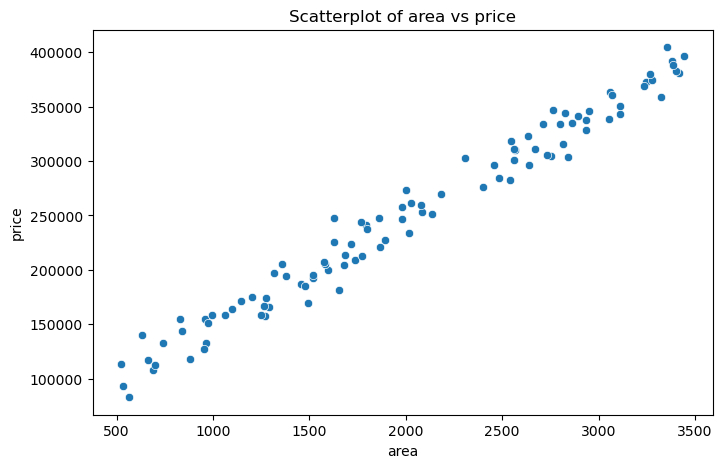

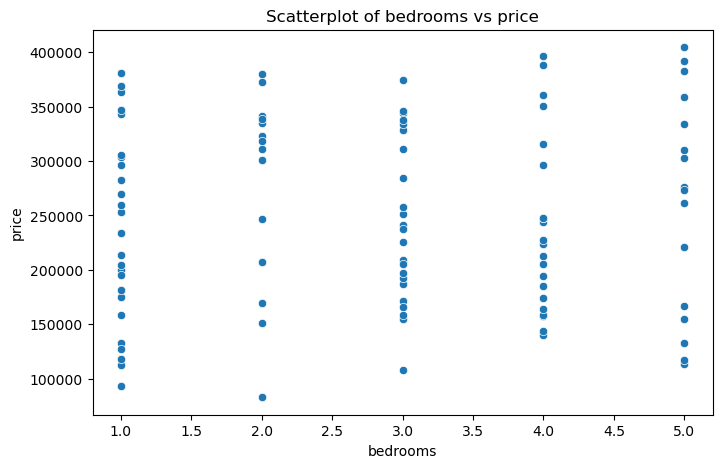

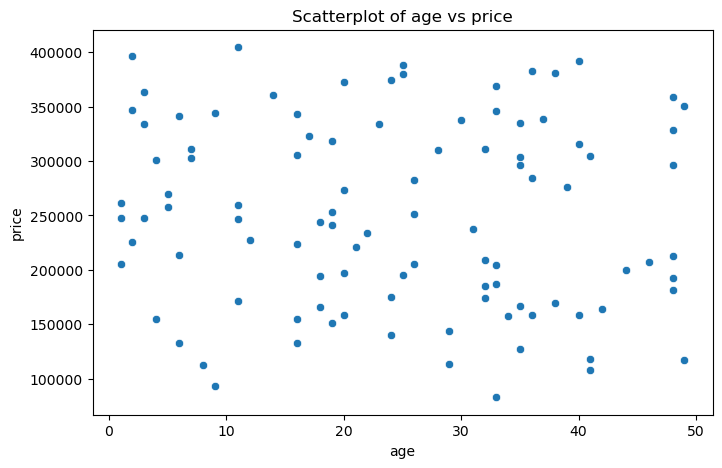

In [6]:
# Define the target variable
target = 'price'  # Replace with 'SalePrice' or your dataset's target variable

# Define key numerical features (replace with your dataset's feature names)
key_features = ['area', 'bedrooms', 'age']  # Example: Rooms, lower status population, house age

# Plot scatterplots
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[feature], y=data[target])
    plt.title(f'Scatterplot of {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()


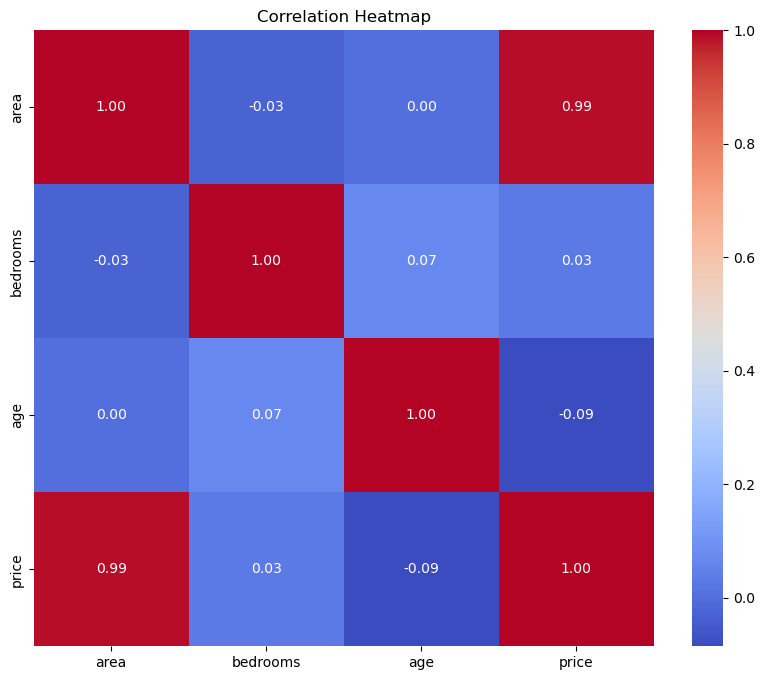

In [7]:
# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# iii) Handle Missing Values
# Drop rows or columns with missing values.
# Fill missing values with mean, median, or another strategy.
# Example: Filling missing values with median of column 'bedrooms' (does nothing if no missing values)
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].median())

In [9]:
# iv) Feature Engineering
# Create new features if necessary.
# Normalize or scale features if needed.

# Example: Scale area to thousands
data['area_in_thousands'] = data['area'] / 1000

# # Example: Min-Max Scaling
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# data['area_minmax'] = scaler.fit_transform(data[['area']])

# # Example: Standard Scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data['area_standard'] = scaler.fit_transform(data[['area']])

In [10]:
# v) Split the Data into features (X) and target (y):
X = data[['area', 'bedrooms', 'age']]
y = data['price']

In [11]:
# vi) Split the dataset into training and testing sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Training data size: (80, 3)
Testing data size: (20, 3)


In [12]:
# vii) Save Processed Data
X_train.to_csv("data/processed/X_train.csv", index=False)
X_test.to_csv("data/processed/X_test.csv", index=False)
y_train.to_csv("data/processed/y_train.csv", index=False)
y_test.to_csv("data/processed/y_test.csv", index=False)


In [13]:
# 2) BUILDING AND TRAINING THE MODEL

# i) Load preprocessed training and testing datasets
X_train = pd.read_csv("data/processed/X_train.csv")
X_test = pd.read_csv("data/processed/X_test.csv")
y_train = pd.read_csv("data/processed/y_train.csv")
y_test = pd.read_csv("data/processed/y_test.csv")

# When reading data from a CSV file, pandas.read_csv() returns a DataFrame by default, which is 
# inherently 2D, even if it contains just a single column (becomes (N,1) shaped).

In [14]:
# Convert target variables from 2D arrays ((N, 1) shape) to 1D arrays ((N, 0) shape)
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Many Scikit-learn methods, such as model.fit() and model.predict(), expect target variables (y)
# to be 1-dimensional arrays, not 2D. If y remains as a DataFrame with shape (N, 1), it may raise 
# a warning or error.

In [15]:
# ii) Initialize model (e.g. linear regression)
model = LinearRegression()

In [16]:
# iii) Train the model on the training dataset
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# iv) Evaluate model
from sklearn.metrics import mean_squared_error, r2_score
# Predict on the test set
y_pred = model.predict(X_test)
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)

# Save the Trained Model
joblib.dump(model, "models/linear_regression_model.pkl")

Mean Squared Error (MSE): 145526791.58064508
R-squared (R2 Score): 0.9765035169083319


['models/linear_regression_model.pkl']

In [18]:
# 3) EVALUATING THE MODEL ON UNSEEN (TEST) DATA

# i) Load trained model
model = joblib.load("models/linear_regression_model.pkl")

In [19]:
# ii) Load preprocessed test data
X_test = pd.read_csv("data/processed/X_test.csv")
Y_test = pd.read_csv("data/processed/Y_test.csv")

In [20]:
# iii) Use the trained model to predict on the test data
y_pred = model.predict(X_test)

In [21]:
# iv) Evaluate prediction on test data

#a) mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

#b) mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

#c) root mean squared error
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

#d) R squared and adjusted R squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# Calculate Adjusted R2
n = X_test.shape[0]  # Number of observations
k = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print("Adjusted R-squared:", adjusted_r2)

# MAE, MSE, RMSE: Lower values indicate better performance.
# 𝑅 squared: A higher value (close to 1) indicates that model explains a 
# large proportion of the variance in the data.
# Adjusted R squared: Use this to verify R squared, especially if have multiple features.

Mean Absolute Error (MAE): 10372.931296228238
Mean Squared Error (MSE): 145526791.58064508
Root Mean Squared Error (RMSE): 12063.448577444391
R-squared (R2): 0.9765035169083319
Adjusted R-squared: 0.9720979263286441


In [22]:
n = len(y_test)  # Number of data points
p = X_test.shape[1]  # Number of predictors (features)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(adjusted_r2)
print(n)
print(p)
print(r2)
print((1 - r2) * (n - 1) / (n - p - 1))

0.9720979263286441
20
3
0.9765035169083319
0.02790207367135584


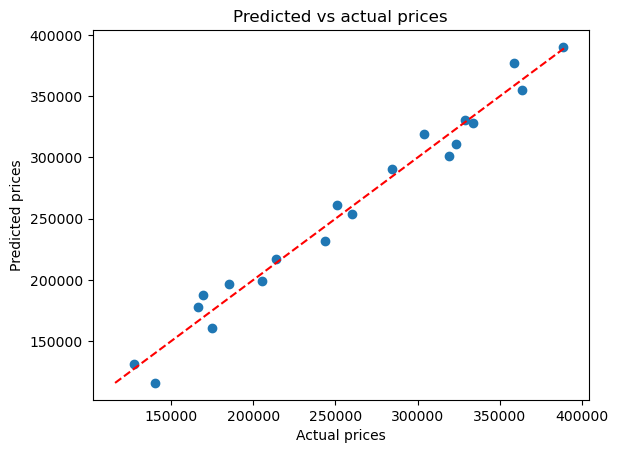

In [23]:
plt.scatter(y_test, y_pred)
# Plot the 45-degree diagonal line (y = x)
min_val = min(min(y_test), min(y_pred))  # Find the minimum value
max_val = max(max(y_test), max(y_pred))  # Find the maximum value
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y = x)')
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Predicted vs actual prices')
plt.show()

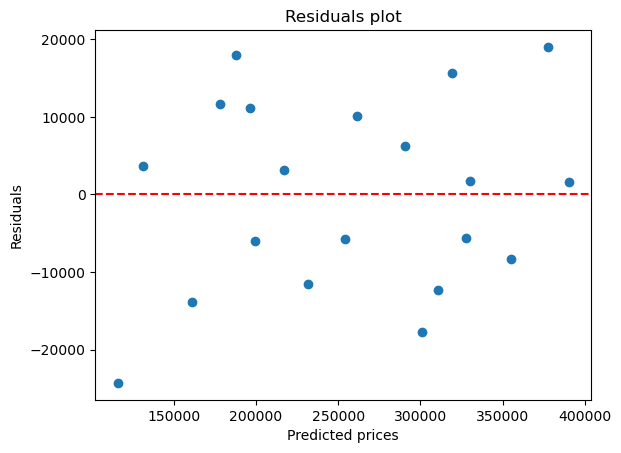

In [24]:
residuals = y_pred - y_test
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Residuals plot')
plt.show()

In [25]:
# Step 4: Model Optimization and Fine-Tuning

# Hyperparameter Tuning: Ridge and Lasso regression

# Define hyperparameters to tune
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Ridge Regression
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_cv.fit(X_train, y_train)
print("Best Ridge Alpha:", ridge_cv.best_params_)
print("Best Ridge R2 Score:", ridge_cv.best_score_)

# Lasso Regression
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_cv.fit(X_train, y_train)
print("Best Lasso Alpha:", lasso_cv.best_params_)
print("Best Lasso R2 Score:", lasso_cv.best_score_)


Best Ridge Alpha: {'alpha': 10}
Best Ridge R2 Score: 0.9851015551580178
Best Lasso Alpha: {'alpha': 100}
Best Lasso R2 Score: 0.9850751165517423


In [26]:
# Set up K-Fold cross-validation
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Cross-validation scoring for MSE and R²
mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Convert negative MSE to positive
mse_scores = -mse_scores

# Display results
print(f"Mean MSE: {mse_scores.mean():.2f}")
print(f"Standard Deviation of MSE: {mse_scores.std():.2f}")
print(f"Mean R²: {r2_scores.mean():.2f}")
print(f"Standard Deviation of R²: {r2_scores.std():.2f}")


Mean MSE: 107032462.80
Standard Deviation of MSE: 40385528.48
Mean R²: 0.98
Standard Deviation of R²: 0.01
